In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [2]:
df = pd.read_csv('Unified-1.csv', low_memory = False)

In [3]:
df.isna()

,DATE,TIME,STATION,LATITUDE,LONGITUDE,ELEVATION,TEMPERATURE,RELATIVE HUMIDITY,ACTUAL VAPOR PRESSURE,DEWPOINT TEMPERATURE,WIND DIRECTION,WIND GUST,WIND SPEED,GLOBAL SOLAR RADIATION,SOLAR RADIATION/MIN,PRECIPITATION,BAROMETRIC PRESSURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
131209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
131210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
131211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [4]:
date_obj = pd.to_datetime(df['DATE'], format ='%m/%d/%Y')
df['date']= date_obj

df['hour'] = df['TIME'].str.split(':').apply(lambda x: int(x[0]) + int(x[1]) / 60)
df.dtypes

DATE                              object
TIME                              object
STATION                           object
LATITUDE                          object
LONGITUDE                         object
ELEVATION                         object
TEMPERATURE                       object
RELATIVE HUMIDITY                 object
ACTUAL VAPOR PRESSURE            float64
DEWPOINT TEMPERATURE              object
WIND DIRECTION                   float64
WIND GUST                        float64
WIND SPEED                       float64
GLOBAL SOLAR RADIATION           float64
SOLAR RADIATION/MIN              float64
PRECIPITATION                    float64
BAROMETRIC PRESSURE              float64
date                      datetime64[ns]
hour                             float64
dtype: object

In [5]:
df['TEMPERATURE'] = df['TEMPERATURE'].str.replace('-', ' ').str.replace('+', ' ')
df['RELATIVE HUMIDITY'] = df['RELATIVE HUMIDITY'].str.replace('-', ' ').str.replace('+', ' ')
df['DEWPOINT TEMPERATURE'] = df['DEWPOINT TEMPERATURE'].str.replace('-', ' ').str.replace('+', ' ')

df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']] = df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']].astype(float)


In [6]:
df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']] = df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']].astype(float)


In [7]:
df.fillna(value = 0, inplace = True)
df

,DATE,TIME,STATION,LATITUDE,LONGITUDE,ELEVATION,TEMPERATURE,RELATIVE HUMIDITY,ACTUAL VAPOR PRESSURE,DEWPOINT TEMPERATURE,WIND DIRECTION,WIND GUST,WIND SPEED,GLOBAL SOLAR RADIATION,SOLAR RADIATION/MIN,PRECIPITATION,BAROMETRIC PRESSURE,date,hour
0,01/01/2019,0:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.13,78.57,0.39,21.35,200.1,5.92,2.00,2343.0,0.0,12.98,30.41,2019-01-01,0.0
1,01/01/2019,1:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.55,76.13,0.39,21.03,253.4,5.48,2.54,2343.0,0.0,12.98,30.40,2019-01-01,1.0
2,01/01/2019,2:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.20,74.20,0.37,20.08,295.2,3.51,1.87,2343.0,0.0,12.98,30.40,2019-01-01,2.0
3,01/01/2019,3:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.41,77.32,0.39,21.25,260.2,4.16,2.10,2343.0,0.0,12.98,30.39,2019-01-01,3.0
4,01/01/2019,4:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',28.04,79.24,0.41,22.44,166.1,3.95,1.22,2343.0,0.0,12.98,30.37,2019-01-01,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131208,01/01/2022,19:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',12.60,82.60,0.22,8.31,197.7,0.88,0.10,5763.0,0.0,9.28,0.00,2022-01-01,19.0
131209,01/01/2022,20:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',12.83,78.70,0.21,7.45,337.1,3.95,1.50,5763.0,0.0,9.29,0.00,2022-01-01,20.0
131210,01/01/2022,21:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',12.73,76.28,0.21,6.68,320.5,4.16,1.91,5763.0,0.0,9.29,0.00,2022-01-01,21.0
131211,01/01/2022,22:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',11.19,78.99,0.20,5.94,336.2,4.38,1.65,5763.0,0.0,9.28,0.00,2022-01-01,22.0


In [8]:
df['date_float']= df['date'].astype('int64')/10**9

In [9]:
X = df[['date_float','hour','TEMPERATURE', 'RELATIVE HUMIDITY', 'ACTUAL VAPOR PRESSURE', 'DEWPOINT TEMPERATURE', 'WIND DIRECTION', 'WIND GUST', 'WIND SPEED','SOLAR RADIATION/MIN','PRECIPITATION', 'BAROMETRIC PRESSURE']].values
y = df['GLOBAL SOLAR RADIATION'].values.reshape(-1, 1)  
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=70)


# Standardize features
scaler1 = StandardScaler()
scaler2 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)
X_val_scaled = scaler1.transform(X_val)
X_test_scaled = scaler1.transform(X_test)
y_train_scaled = scaler2.fit_transform(y_train)
y_val_scaled = scaler2.transform(y_val)
y_test_scaled = scaler2.transform(y_test)

#print(f"{X_train.shape} {X_val.shape} :: {X_test.shape}" )

In [10]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [13]:
import torch.nn.functional as F

class ComplexModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch normalization
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)  # Batch normalization
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)  # Batch normalization
        self.out = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.5)  # Dropout with 50% probability
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.out(x)
        return x

# Parameters
batch_size = 72
input_size = X_train_tensor.shape[1]
hidden_size = 300  # Number of neurons in the hidden layer
output_size = 1  # As a regression task
learning_rate = 0.01
model = ComplexModel(input_size, hidden_size, output_size)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Xavier initialization
for layer in [model.fc1, model.fc2, model.fc3, model.out]:
    nn.init.xavier_uniform_(layer.weight)

# Define loss function and optimizer
criterion = nn.L1Loss()  # Using Mean Squared Error loss for regression
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.01)




Epoch [1/100], Train Loss: 0.9039, Valid Loss: 0.8624, Test Loss: 0.8628
Epoch [2/100], Train Loss: 0.8680, Valid Loss: 0.8599, Test Loss: 0.8602
Epoch [3/100], Train Loss: 0.8660, Valid Loss: 0.8602, Test Loss: 0.8607
Epoch [4/100], Train Loss: 0.8628, Valid Loss: 0.8590, Test Loss: 0.8594
Epoch [5/100], Train Loss: 0.8618, Valid Loss: 0.8586, Test Loss: 0.8589
Epoch [6/100], Train Loss: 0.8601, Valid Loss: 0.8580, Test Loss: 0.8583
Epoch [7/100], Train Loss: 0.8591, Valid Loss: 0.8578, Test Loss: 0.8581
Epoch [8/100], Train Loss: 0.8587, Valid Loss: 0.8571, Test Loss: 0.8574
Epoch [9/100], Train Loss: 0.8577, Valid Loss: 0.8575, Test Loss: 0.8577
Epoch [10/100], Train Loss: 0.8569, Valid Loss: 0.8564, Test Loss: 0.8566
Epoch [11/100], Train Loss: 0.8560, Valid Loss: 0.8561, Test Loss: 0.8563
Epoch [12/100], Train Loss: 0.8555, Valid Loss: 0.8555, Test Loss: 0.8556
Epoch [13/100], Train Loss: 0.8556, Valid Loss: 0.8553, Test Loss: 0.8554
Epoch [14/100], Train Loss: 0.8547, Valid Loss:

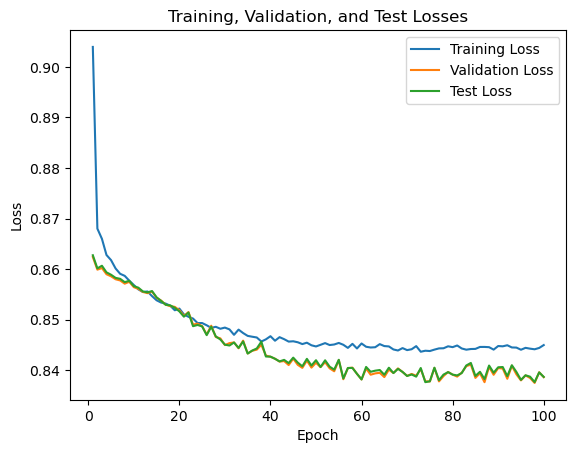

In [14]:
# Training loop Validation and Test loop
train_losses = []
valid_losses = []
test_losses = []

num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0
    valid_loss = 0
    test_loss = 0
    
    model.train()  
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
    
    # Calculate average loss per sample for the epoch
    train_loss /= len(train_loader.dataset)
    valid_loss /= len(val_loader.dataset)
    test_loss /= len(test_loader.dataset)
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    # Append losses to the lists
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    test_losses.append(test_loss)

# Evaluation 
model.eval()  
with torch.no_grad():
    train_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        train_loss += criterion(outputs, labels).item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    print(f'Train Loss: {train_loss:.4f}')

model.eval()  
with torch.no_grad():
    val_loss = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        val_loss += criterion(outputs, labels).item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
    print(f'Validation Loss: {val_loss:.4f}')

model.eval()  
with torch.no_grad():
    test_loss = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, labels).item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), valid_losses, label='Validation Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Losses')
plt.legend()
plt.show()
